In [766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [974]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [768]:
df.shape

(1338, 7)

In [769]:
#Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [770]:
df.index

RangeIndex(start=0, stop=1338, step=1)

In [771]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [772]:
#Statistical summary of the Numarical data
# df.describe(include=int)

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [773]:
#Statistical summary of categorical data

df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [774]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [775]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [776]:
df["age"].value_counts().head()

age
18    69
19    68
50    29
51    29
47    29
Name: count, dtype: int64

In [777]:
# print(len(df['age'].unique()))
df["age"].nunique()

47

In [778]:
a=df['age']

In [779]:
a.index.values

array([   0,    1,    2, ..., 1335, 1336, 1337], dtype=int64)

In [780]:
help(a.index.values)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [781]:
x=[1,2,3,'NaN',5,6,'NaN',8,9]
y=[11,22,33,55,'NaN',55,66,'NaN',88]

ds=pd.DataFrame({'num1':x,'num2':y})
ds

,num1,num2
0,1,11
1,2,22
2,3,33
3,NaN,55
4,5,NaN
5,6,55
6,NaN,66
7,8,NaN
8,9,88


In [782]:
ds.replace('NaN',np.nan,inplace=True)

In [783]:
ds['exp']=ds['num1'].apply(lambda x: np.nan if x%2==0 else 3)
ds

,num1,num2,exp
0,1.0,11.0,3.0
1,2.0,22.0,NaN
2,3.0,33.0,3.0
3,NaN,55.0,3.0
4,5.0,NaN,3.0
5,6.0,55.0,NaN
6,NaN,66.0,3.0
7,8.0,NaN,NaN
8,9.0,88.0,3.0


In [784]:
ds.isna()

,num1,num2,exp
0,False,False,False
1,False,False,True
2,False,False,False
3,True,False,False
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,True
8,False,False,False


In [785]:
ds[ds['num1'].isna() | ds['num2'].isna()]

,num1,num2,exp
3,NaN,55.0,3.0
4,5.0,NaN,3.0
6,NaN,66.0,3.0
7,8.0,NaN,NaN


In [786]:
ds[ds['num1'].isna() | ds['num2'].isna()].isna()

,num1,num2,exp
3,True,False,False
4,False,True,False
6,True,False,False
7,False,True,True


In [787]:
ds[ds['num1'].isna()]

,num1,num2,exp
3,NaN,55.0,3.0
6,NaN,66.0,3.0


In [788]:
ds[ds['num2'].isna()]

,num1,num2,exp
4,5.0,NaN,3.0
7,8.0,NaN,NaN


In [789]:
ds[ds['exp'].isna()]

,num1,num2,exp
1,2.0,22.0,NaN
5,6.0,55.0,NaN
7,8.0,NaN,NaN


In [790]:
ds.dropna()

,num1,num2,exp
0,1.0,11.0,3.0
2,3.0,33.0,3.0
8,9.0,88.0,3.0


In [791]:
res=ds[ds['num1'].isna()]
ind=res.index
ind

Index([3, 6], dtype='int64')

In [792]:
for i in ind:
    ds['num1'].fillna('python',inplace=True)
ds

,num1,num2,exp
0,1.0,11.0,3.0
1,2.0,22.0,NaN
2,3.0,33.0,3.0
3,python,55.0,3.0
4,5.0,NaN,3.0
5,6.0,55.0,NaN
6,python,66.0,3.0
7,8.0,NaN,NaN
8,9.0,88.0,3.0


## Pandas Joins

In [793]:
x=['A','B','C','D','E','F','G']
y=[1,2,3,4,5,6,1]
z=[1000,2000,3000,4000,2000,6000,9000]

a=[1,2,3,4,7]
b=['Retail','Engg','Finance','Healthcare','Transportation']

In [794]:
df1=pd.DataFrame({'emp_name':x,'dep_id':y,'emp_salary':z})
df2=pd.DataFrame({'dep_id':a,'emp_dept':b})

In [795]:
print(df1)
print("*"*20)
print(df2)

  emp_name  dep_id  emp_salary
0        A       1        1000
1        B       2        2000
2        C       3        3000
3        D       4        4000
4        E       5        2000
5        F       6        6000
6        G       1        9000
********************
   dep_id        emp_dept
0       1          Retail
1       2            Engg
2       3         Finance
3       4      Healthcare
4       7  Transportation


In [796]:
pd.merge(left=df1,right=df2,how='inner',on='dep_id')

,emp_name,dep_id,emp_salary,emp_dept
0,A,1,1000,Retail
1,G,1,9000,Retail
2,B,2,2000,Engg
3,C,3,3000,Finance
4,D,4,4000,Healthcare


In [797]:
pd.merge(left=df1,right=df2,how='left',on='dep_id')

,emp_name,dep_id,emp_salary,emp_dept
0,A,1,1000,Retail
1,B,2,2000,Engg
2,C,3,3000,Finance
3,D,4,4000,Healthcare
4,E,5,2000,NaN
5,F,6,6000,NaN
6,G,1,9000,Retail


In [798]:
pd.merge(left=df1,right=df2,how='right',on="dep_id")

,emp_name,dep_id,emp_salary,emp_dept
0,A,1,1000.0,Retail
1,G,1,9000.0,Retail
2,B,2,2000.0,Engg
3,C,3,3000.0,Finance
4,D,4,4000.0,Healthcare
5,NaN,7,NaN,Transportation


In [799]:
pd.merge(left=df1,right=df2,how='outer',on='dep_id')

,emp_name,dep_id,emp_salary,emp_dept
0,A,1,1000.0,Retail
1,G,1,9000.0,Retail
2,B,2,2000.0,Engg
3,C,3,3000.0,Finance
4,D,4,4000.0,Healthcare
5,E,5,2000.0,NaN
6,F,6,6000.0,NaN
7,NaN,7,NaN,Transportation


In [800]:
df1.rename(columns={'dep_id':'emp_id'})

,emp_name,emp_id,emp_salary
0,A,1,1000
1,B,2,2000
2,C,3,3000
3,D,4,4000
4,E,5,2000
5,F,6,6000
6,G,1,9000


In [801]:
df1.rename(columns={'dep_id':'emp_id'},inplace=True)

In [802]:
df1

,emp_name,emp_id,emp_salary
0,A,1,1000
1,B,2,2000
2,C,3,3000
3,D,4,4000
4,E,5,2000
5,F,6,6000
6,G,1,9000


In [803]:
df2

,dep_id,emp_dept
0,1,Retail
1,2,Engg
2,3,Finance
3,4,Healthcare
4,7,Transportation


In [804]:
pd.merge(left=df1,right=df2,how='inner',left_on='emp_id',right_on='dep_id')

,emp_name,emp_id,emp_salary,dep_id,emp_dept
0,A,1,1000,1,Retail
1,G,1,9000,1,Retail
2,B,2,2000,2,Engg
3,C,3,3000,3,Finance
4,D,4,4000,4,Healthcare


In [805]:
pd.concat([df1,df2],axis=0)

,emp_name,emp_id,emp_salary,dep_id,emp_dept
0,A,1.0,1000.0,NaN,NaN
1,B,2.0,2000.0,NaN,NaN
2,C,3.0,3000.0,NaN,NaN
3,D,4.0,4000.0,NaN,NaN
4,E,5.0,2000.0,NaN,NaN
5,F,6.0,6000.0,NaN,NaN
6,G,1.0,9000.0,NaN,NaN
0,NaN,NaN,NaN,1.0,Retail
1,NaN,NaN,NaN,2.0,Engg
2,NaN,NaN,NaN,3.0,Finance


In [806]:
pd.concat([df1,df2],axis=1)

,emp_name,emp_id,emp_salary,dep_id,emp_dept
0,A,1,1000,1.0,Retail
1,B,2,2000,2.0,Engg
2,C,3,3000,3.0,Finance
3,D,4,4000,4.0,Healthcare
4,E,5,2000,7.0,Transportation
5,F,6,6000,NaN,NaN
6,G,1,9000,NaN,NaN


## Groupby and Aggregate

In [808]:
df1

,emp_name,emp_id,emp_salary
0,A,1,1000
1,B,2,2000
2,C,3,3000
3,D,4,4000
4,E,5,2000
5,F,6,6000
6,G,1,9000


In [818]:
new_row=pd.Series({'emp_name':'H','emp_id':2,'emp_salary':12000})
new_row_df=pd.DataFrame(new_row)
new_row_df

,0
emp_name,H
emp_id,2
emp_salary,12000


In [819]:
new_row=pd.Series({'emp_name':'H','emp_id':2,'emp_salary':12000})
new_row_df=pd.DataFrame([new_row])
new_row_df

,emp_name,emp_id,emp_salary
0,H,2,12000


In [824]:
df1=pd.concat([df1,new_row_df],axis=0,ignore_index=True)
df1

,emp_name,emp_id,emp_salary
0,A,1,1000
1,B,2,2000
2,C,3,3000
3,D,4,4000
4,E,5,2000
5,F,6,6000
6,G,1,9000
7,H,2,12000
8,H,2,12000
9,H,2,12000


In [826]:
df1.drop([8,9],inplace=True)

In [827]:
df1

,emp_name,emp_id,emp_salary
0,A,1,1000
1,B,2,2000
2,C,3,3000
3,D,4,4000
4,E,5,2000
5,F,6,6000
6,G,1,9000
7,H,2,12000


In [829]:
new1_row=pd.Series({'emp_name':'Z','emp_id':3,'emp_salary':15000})
new1_row_df=pd.DataFrame([new1_row])
new1_row_df

,emp_name,emp_id,emp_salary
0,Z,3,15000


In [836]:
df3=pd.concat([df1.iloc[:1],new1_row_df,df1.iloc[1:]]).reset_index(drop=True)
df3

,emp_name,emp_id,emp_salary
0,A,1,1000
1,Z,3,15000
2,B,2,2000
3,C,3,3000
4,D,4,4000
5,E,5,2000
6,F,6,6000
7,G,1,9000
8,H,2,12000


In [837]:
df3.insert(len(df3.columns),'emp_location','HYD')

In [838]:
df3

,emp_name,emp_id,emp_salary,emp_location
0,A,1,1000,HYD
1,Z,3,15000,HYD
2,B,2,2000,HYD
3,C,3,3000,HYD
4,D,4,4000,HYD
5,E,5,2000,HYD
6,F,6,6000,HYD
7,G,1,9000,HYD
8,H,2,12000,HYD


In [840]:
df3.rename(columns={'emp_location':'emp_loc'},inplace=True)

In [841]:
df3

,emp_name,emp_id,emp_salary,emp_loc
0,A,1,1000,HYD
1,Z,3,15000,HYD
2,B,2,2000,HYD
3,C,3,3000,HYD
4,D,4,4000,HYD
5,E,5,2000,HYD
6,F,6,6000,HYD
7,G,1,9000,HYD
8,H,2,12000,HYD


In [852]:
df3['emp_rating']=df3['emp_id'].apply(lambda x: 3 if x%2==0 else 4)

In [853]:
df3

,emp_name,emp_id,emp_salary,emp_loc,emp_rating
0,A,1,1000,HYD,4
1,Z,3,15000,HYD,4
2,B,2,2000,HYD,3
3,C,3,3000,HYD,4
4,D,4,4000,HYD,3
5,E,5,2000,HYD,4
6,F,6,6000,HYD,3
7,G,1,9000,HYD,4
8,H,2,12000,HYD,3


In [858]:
df3.replace('HYD','BLR',inplace=True)

In [859]:
df3

,emp_name,emp_id,emp_salary,emp_loc,emp_rating
0,A,1,1000,BLR,4
1,Z,3,15000,BLR,4
2,B,2,2000,BLR,3
3,C,3,3000,BLR,4
4,D,4,4000,BLR,3
5,E,5,2000,BLR,4
6,F,6,6000,BLR,3
7,G,1,9000,BLR,4
8,H,2,12000,BLR,3


In [866]:
emp_rating_group=df3.groupby('emp_rating').sum()
emp_rating_group

,emp_name,emp_id,emp_salary,emp_loc
emp_rating,,,,
3,BDFH,14,24000,BLRBLRBLRBLR
4,AZCEG,13,30000,BLRBLRBLRBLRBLR


In [868]:
emp_group=df3.groupby(['emp_rating','emp_id']).sum()
emp_group

emp_name  emp_salary emp_loc
emp_rating emp_id                             
3          2            BH       14000  BLRBLR
           4             D        4000     BLR
           6             F        6000     BLR
4          1            AG       10000  BLRBLR
           3            ZC       18000  BLRBLR
           5             E        2000     BLR

In [873]:
emp_agg=df3.groupby(['emp_rating','emp_id']).aggregate(emp_count=('emp_name',np.size),
                                                      emp_salary_sum=('emp_salary',np.sum))
emp_agg

emp_count  emp_salary_sum
emp_rating emp_id                           
3          2               2           14000
           4               1            4000
           6               1            6000
4          1               2           10000
           3               2           18000
           5               1            2000

In [874]:
emp_agg.index

MultiIndex([(3, 2),
            (3, 4),
            (3, 6),
            (4, 1),
            (4, 3),
            (4, 5)],
           names=['emp_rating', 'emp_id'])

In [881]:
new_index=[]
for i in range(len(emp_agg.index)):
    new_index.append(emp_agg.index[i][0]+emp_agg.index[i][1])
print(new_index)

[5, 7, 9, 5, 7, 9]


In [883]:
emp_agg.index=new_index

In [884]:
emp_agg

,emp_count,emp_salary_sum
5,2,14000
7,1,4000
9,1,6000
5,2,10000
7,2,18000
9,1,2000


In [891]:
res=df3.groupby(['emp_rating'])

In [892]:
res

## UniVariate Analysis

In [894]:
# Numaric column--->Histogram

In [964]:
df

,emp_name,emp_id,emp_rating
0,A,1,3
1,B,2,4
2,C,3,3
3,A,4,4
4,B,5,3
5,A,6,3
6,C,7,4
7,C,8,4
8,B,9,3


In [965]:
plt.figure(figsize=(10,10))
plt.hist(df['age'],color='Red',bins=20,edgecolor='Green')
plt.title('Histogram representation',fontsize=20)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

KeyError: 'age'

<Figure size 1000x1000 with 0 Axes>

In [966]:
sns.kdeplot(df['age'])
plt.show()

KeyError: 'age'

In [967]:
sns.countplot(x='sex',data=df)
plt.show()

ValueError: Could not interpret input 'sex'

In [968]:
# Categorical column and categorical(count)--->Bar or pie chart

In [969]:
res=df.groupby(df['sex']).aggregate(total_count=('sex',np.size))
res=res.sort_values(by='total_count',ascending=False)
res

KeyError: 'sex'

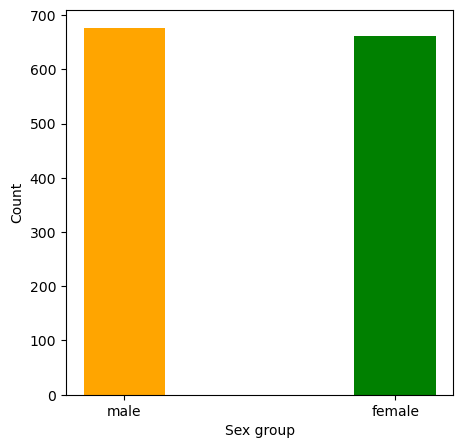

In [970]:
plt.figure(figsize=(5,5))
plt.bar(x=res.index.values,height=res['total_count'],color=['orange','green'],width=0.3)
plt.xlabel('Sex group')
plt.ylabel('Count')
plt.show()

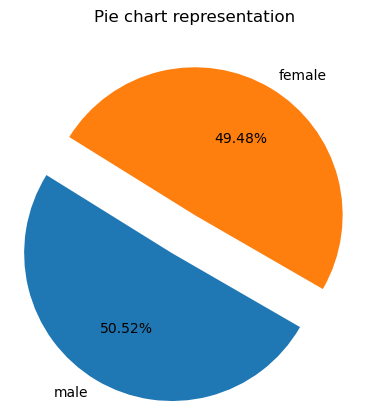

In [971]:
plt.pie(x=res['total_count'],labels=res.index.values,startangle=-30,counterclock=False,autopct='%1.2F%%',explode=[0.3,0])
plt.title('Pie chart representation')
plt.show()

## BiVariate Analysis

In [975]:
# Numarical vs Numarical--->ScatterPlot
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


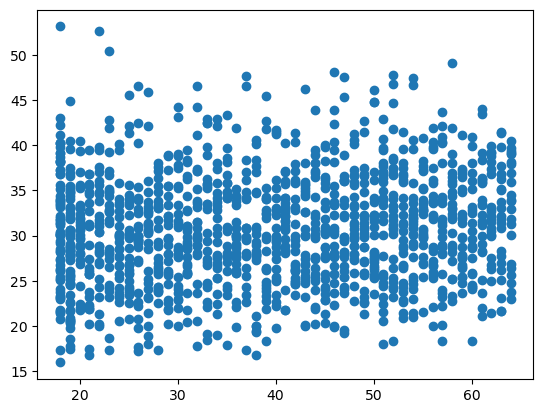

In [976]:
plt.scatter(x=df['age'],y=df['bmi'])
plt.show()

In [979]:
# Categorical vs Numarical--->Bar or pie chart


In [980]:
res=df.groupby('region').aggregate(avg_charges=('charges',np.mean),
                                  children_count=('children',np.size))
res

,avg_charges,children_count
region,,
northeast,13406.384516,324
northwest,12417.575374,325
southeast,14735.411438,364
southwest,12346.937377,325


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17604\373823032.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


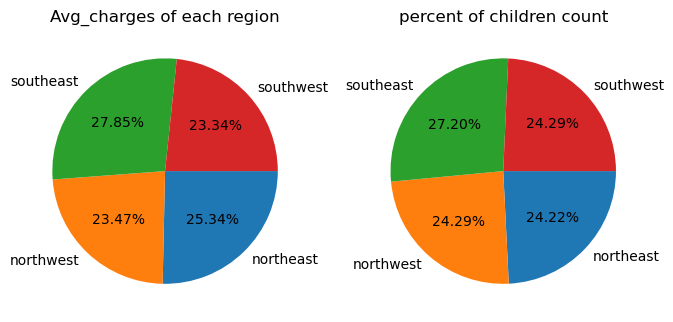

In [988]:
plt.figure(figsize=(8,5))
plt.title('Subplot representation')

plt.subplot(1,2,1)
plt.title('Avg_charges of each region')
plt.pie(x=res['avg_charges'],labels=res.index.values,startangle=0,counterclock=False,autopct='%1.2F%%')

plt.subplot(1,2,2)
plt.title('percent of children count')
plt.pie(x=res['children_count'],labels=res.index.values,startangle=0,counterclock=False,autopct='%1.2F%%')

plt.show()

## Multivariate Analysis

In [990]:
# (Numarical vs Numarical) and categorical--->scatter plot or line chart

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17604\622131898.py:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df,x='age',y='charges',hue='region',palette=['red','black','green'])


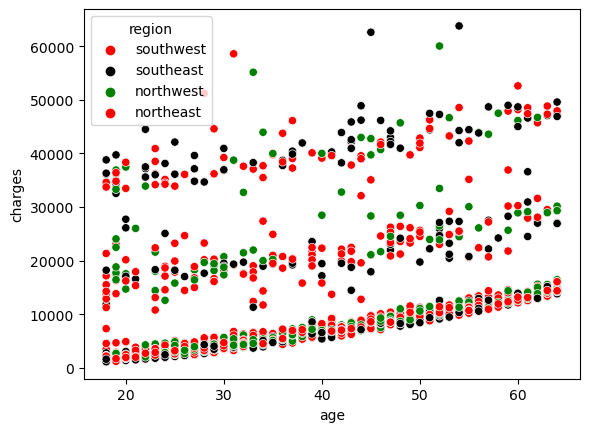

In [1000]:
sns.scatterplot(data=df,x='age',y='charges',hue='region',palette=['red','black','green'])
plt.show()

In [1001]:
# (Categorical vs Numarical) and categorical-->Barplot

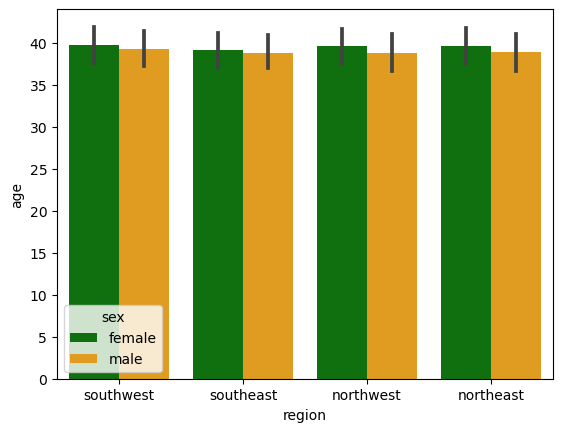

In [1006]:
sns.barplot(data=df,x='region',y='age',hue='sex',palette=['Green','orange'])
plt.show()